<a href="https://colab.research.google.com/github/pythonuzgit/elmurodov/blob/master/Graph%20Neural%20Network/Text_Classification_using_Graph_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl
#!pip install dgl==0.6a210210

In [ ]:
#!pip install openpyxl
#!pip install dgl==0.6a210210
!pip install dgl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00


In [ ]:
!unzip '/content/ag-news-topic-classification.zip'

Archive:  /content/ag-news-topic-classification.zip
  inflating: test_data.csv           
  inflating: training_data.csv       


In [ ]:
!unzip '/content/glove6b50dtxt.zip'

Archive:  /content/glove6b50dtxt.zip
  inflating: glove.6B.50d.txt        


Import Libraries

In [ ]:
import dgl

from dgl.dataloading import GraphDataLoader
from dgl.data import DGLDataset
from dgl.nn.pytorch import GraphConv, GATConv, GatedGraphConv, DotGatConv
from dgl.nn import AvgPooling, MaxPooling

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import operator

import pandas as pd
import pickle

import string
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

import scipy.sparse as sp

from tqdm import tqdm
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn import CrossEntropyLoss
import torch.nn as nn


from wordcloud import WordCloud
import warnings


warnings.filterwarnings('ignore')

sns.set_theme()
sns.set_context("talk")



import nltk
nltk.download('punkt')

import nltk
nltk.download('stopwords')

stopwords=set(stopwords.words('english'))


lemmatizer=WordNetLemmatizer()

seed = 42

Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


DGL backend not selected or invalid.  Assuming PyTorch for now.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


EDA Functions

In [ ]:
def get_label_dist(df, top_k = 4, reverse = False):
    """
    Plots barplot of count of labels in the dataset
    """

    val_count = df['label'].value_counts(normalize = True)

    if not reverse:
        for ind in val_count.index[:top_k]:
            print(f'{ind} : {idx2label[ind]}')
    else:
        for ind in val_count.index[-top_k:]:
            print(f'{ind} : {idx2label[ind]}')

    plt.figure(figsize = (20,6))
    if reverse:
        sns.barplot(x = list(map(str, val_count.index[-top_k:])), y = val_count.values[-top_k:], palette = 'Blues_r')
        plt.title(f'Distribution of normalized count of bottom {top_k} labels')
    else:
        sns.barplot(x = list(map(str, val_count.index[:top_k])), y = val_count.values[:top_k], palette = 'Blues_r')
        plt.title(f'Distribution of normalized count of top {top_k} labels')
    plt.xticks()



def filter_text(text):

    """
    Returns the lowercase of input text by removing punctuations, stopwords
    """

    tokenized_words=word_tokenize(text)
    filtered_words=[word.strip().strip('.').lower() for word in tokenized_words if ((word.lower() not in string.punctuation) &
                                                                 (word.lower() not in stopwords))]


    return ' '.join(filtered_words)


In [ ]:
def plot_textlen_dist(df, label_list, unique = True):
    """
    Plots histogram of number of words in each sample for given list of labels

    """

    assert isinstance(label_list, list), 'label_list must be a list'
    assert all(x in labels for x in label_list), f"The industry must belong to one of {','.join(str(labels))}"
    #values = ','.join(map(str, value_list))

    if unique:
        col = 'unique_text_len'
        title = 'Distribution of number of unique words in description'
    else:
        col = 'text_len'
        title = 'Distribution of number of words in description'

    plt.figure(figsize = (10,6))

    for ind in label_list:
        sns.distplot(df[df['label'] == label2idx[ind]][col], label = ind, kde = False, norm_hist = True)
        plt.legend()

    plt.title(title)
    plt.xlabel('Text Length')



In [ ]:
def plot_wordcloud(text, label, max_font_size=40, max_words=50):

    """
    Plots wordcloud of the input text

    """

    plt.figure(figsize=(10,5))
    wordcloud=WordCloud(max_font_size=max_font_size,max_words=max_words,random_state=seed)
    plot=wordcloud.generate(text)
    plt.title('Industry Tag: ' + label, fontsize = 25)
    plt.imshow(plot)
    plt.axis('off')
    plt.show()



In [ ]:
def get_text(traindf, industry):

    """
    Returns string containing all text from input industry tag

    """

    assert industry in labels, f"The industry must belong to one of {', '.join(labels)}"

    target=traindf[traindf['target']==label2idx[label]].reset_index(drop=True)

    target_text=' '

    for i in range(target.shape[0]):
        target_text+=target.text[i]

    return target_text


In [ ]:
def plot_top_ngrams(traindf, industry, vectorizer = 'count', ngrams=(1,1),top=10,max_features=10000):

    """
    Plots barplot of count of top ngrams occurred in the description for given industry

    """

    assert vectorizer in ['count', 'tfidf'], "vectorizer must be one of 'count' and 'tfidf'"
    assert industry in labels, f"The industry must belong to one of {', '.join(labels)}"

    text = traindf[traindf['label']==label2idx[industry]]['text']

    vector_dict = {'count': CountVectorizer, 'tfidf': TfidfVectorizer}

    cv=vector_dict[vectorizer](ngram_range=ngrams,max_features=max_features)
    trans_text=cv.fit_transform(text)
    col_sum=trans_text.sum(axis=0)
    word_index=[(word,col_sum[0,idx]) for word,idx in cv.vocabulary_.items()]
    sorted_word_index=sorted(word_index,key=lambda x:x[1],reverse=True)
    top_words_index=sorted_word_index[:top]
    top_words=[element[0] for element in top_words_index]
    counts=[element[1] for element in top_words_index]

    plt.figure(figsize=(20,6))
    sns.barplot(x = top_words, y = counts, palette = 'Blues_r')
    plt.title('Industry Tag: ' + industry)
    plt.xticks(rotation = 45)



In [ ]:
def move_legend(ax, idx2label):

    """
    Adds legend to a plot

        Parameters:
            ax (Axes): Axes object
            idx2label (dict): dictionary with ids as keys and labels as values

        Returns:
            Nothing
    """


    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [idx2label[int(t.get_text())] for t in old_legend.get_texts()]

    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, title=title)


Explatory Data Analysis

In [ ]:
traindf = pd.read_csv('/content/training_data.csv')
#traindf.columns = ['company', 'text', 'target']


print('Checking and removing rows with na values in the dataset \n')
print(traindf.isna().sum())
traindf = traindf.dropna(axis = 0).reset_index(drop = True)
print('*'*50)
print('After processing \n')
print(traindf.isna().sum())

Checking and removing rows with na values in the dataset 

text     0
label    0
dtype: int64
**************************************************
After processing 

text     0
label    0
dtype: int64


In [ ]:
traindf.head(10)

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2
5,"Stocks End Up, But Near Year Lows (Reuters) Re...",2
6,Money Funds Fell in Latest Week (AP) AP - Asse...,2
7,Fed minutes show dissent over inflation (USATO...,2
8,Safety Net (Forbes.com) Forbes.com - After ear...,2
9,Wall St. Bears Claw Back Into the Black NEW Y...,2


Now, I create mapping from labels to ids and ids to labels.

In [ ]:
labels = traindf['label'].unique()
print('Number of unique industry tags: ', len(labels))
label2idx = {l:i for i,l in enumerate(sorted(labels))}
idx2label = {v:k for k,v in label2idx.items()}

traindf['label'] = traindf['label'].apply(lambda x: label2idx[x])

Number of unique industry tags:  4


2 : 2
3 : 3
1 : 1
0 : 0


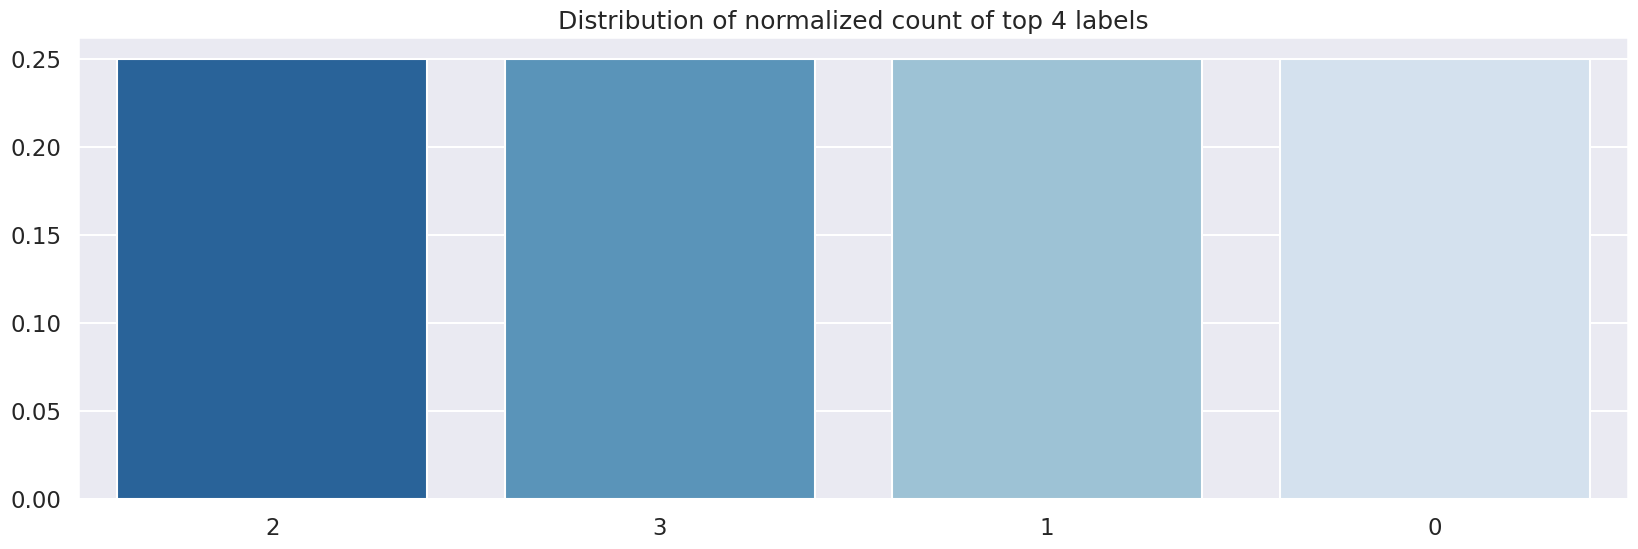

In [ ]:
get_label_dist(traindf, top_k = 4, reverse = False)

2 : 2
3 : 3
1 : 1
0 : 0


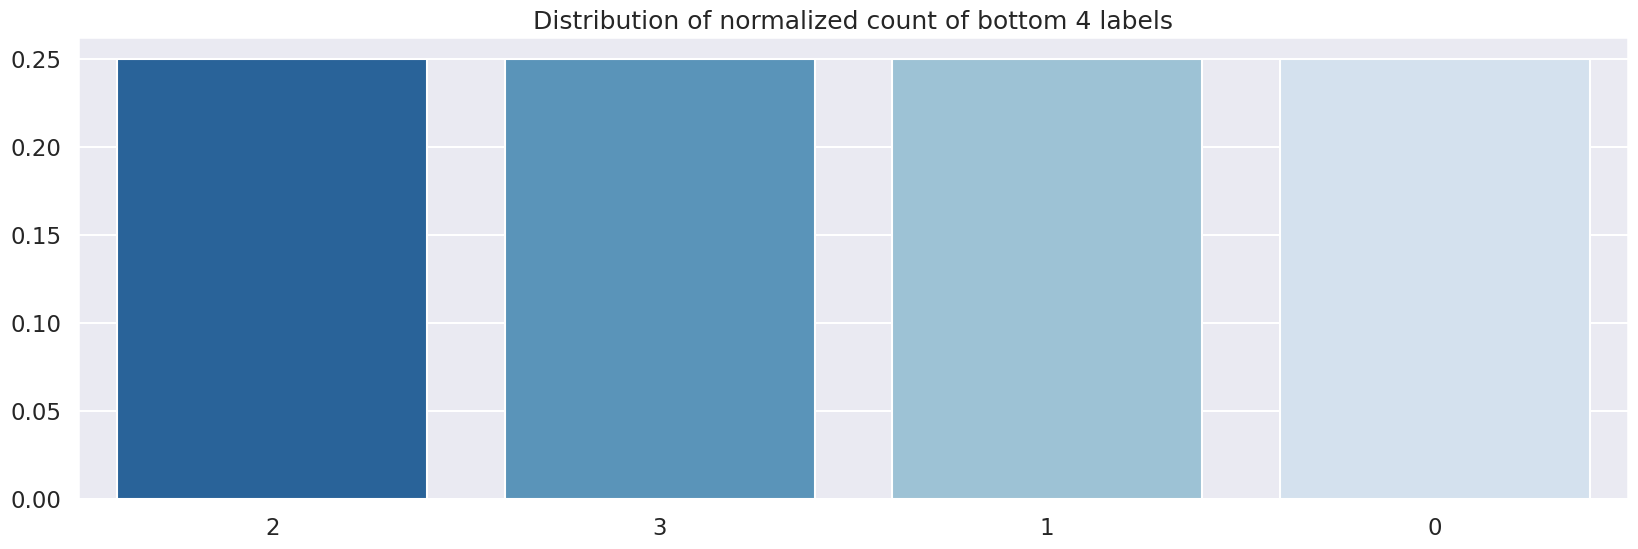

In [ ]:
get_label_dist(traindf, top_k = 4, reverse = True)

Remove stopwords and punctuations and also apply stemmer on the text.

In [ ]:
traindf['text'] = traindf['text'].apply(lambda x: filter_text(x))
traindf['text_len'] = traindf['text'].apply(lambda x: len(x.split()))
traindf['unique_text_len'] = traindf['text'].apply(lambda x: len(set(x.split())))

Check the maximum and minimum of the labelwise mean text length and their industry tags. Use these tags to plot their distributions just to check if there is large difference in them.

In [ ]:
print('Max of mean text length: ', traindf.groupby(by='label')['text_len'].mean().max())
print('Tag of max of mean text length: ', idx2label[traindf.groupby(by='label')['text_len'].mean().argmax()])

print('Min of mean text length: ', traindf.groupby(by='label')['text_len'].mean().min())
print('Tag of min of mean text length: ', idx2label[traindf.groupby(by='label')['text_len'].mean().argmin()])

Max of mean text length:  27.363333333333333
Tag of max of mean text length:  2
Min of mean text length:  25.5869
Tag of min of mean text length:  1


In [ ]:
print(traindf['text_len'].describe())

count    120000.000000
mean         26.625892
std           7.692630
min           7.000000
25%          22.000000
50%          26.000000
75%          30.000000
max         167.000000
Name: text_len, dtype: float64


Plot labelwise normalized distribution of number of words and number of unique words in the next two plots.

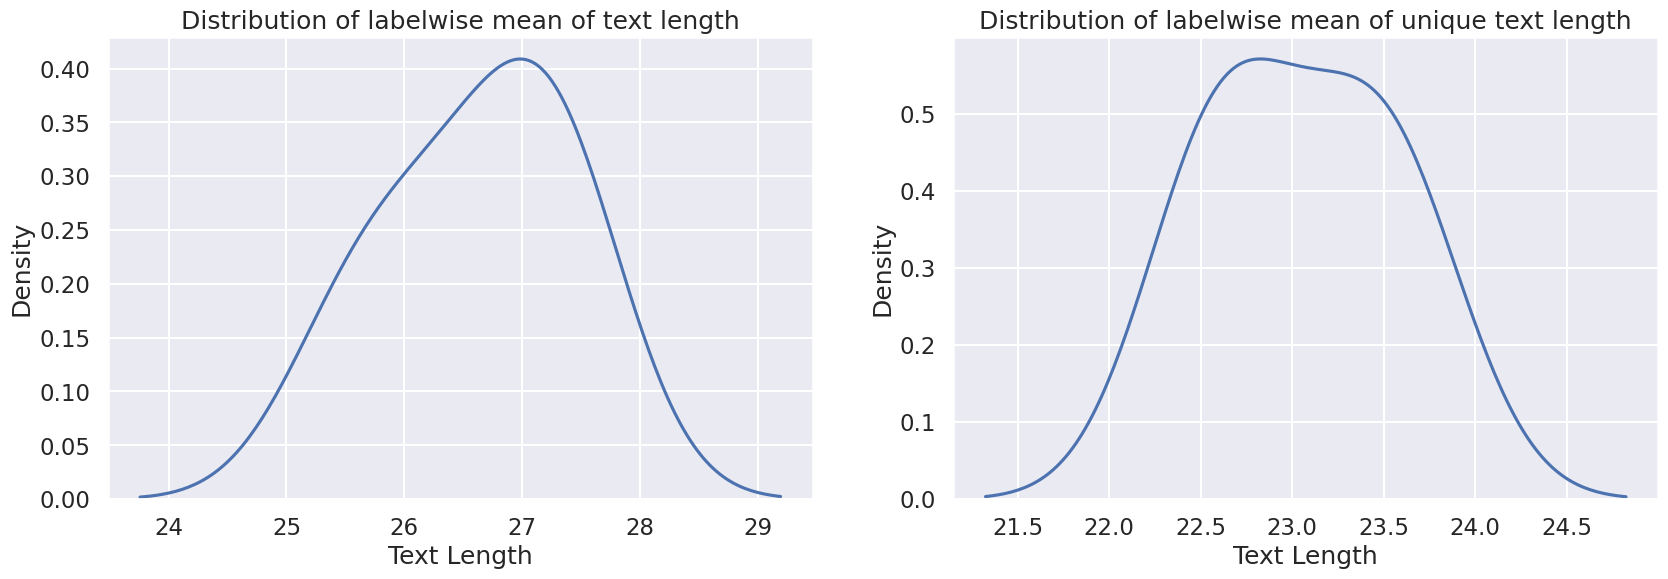

In [ ]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
sns.kdeplot(traindf.groupby(by='label')['text_len'].mean())
plt.xlabel('Text Length')
plt.title('Distribution of labelwise mean of text length')

plt.subplot(1,2,2)
sns.kdeplot(traindf.groupby(by='label')['unique_text_len'].mean())
plt.xlabel('Text Length')
plt.title('Distribution of labelwise mean of unique text length')

plt.show()

Preprocessing for Glove Embeddings

In [ ]:
def load_embeddings(path):
    with open(path,'rb') as f:
        emb_arr = pickle.load(f)
    return emb_arr

def check_coverage(vocab,embeddings_index):
    """
    Returns list of tuples.
    """
    a = {}
    oov = {}
    k = 0
    i = 0
    for word in tqdm(vocab):
        try:
            a[word] = embeddings_index[word]
            k += vocab[word]
        except:

            oov[word] = vocab[word]
            i += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
    sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

    return sorted_x


def build_vocab(sentences, verbose =  True):
    """
    Returns dictionary with keys as words in the sentences and values as their count of occurence

    """
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab


Load glove embeddings of 50 dimnesions

In [ ]:
GLOVE_EMBEDDING_PATH = '/content/glove.6B.50d.txt'



word_embeddings = {}

with open(GLOVE_EMBEDDING_PATH, 'r') as f:
    for line in f.readlines():
        data = line.split()
        word_embeddings[str(data[0])] = list(map(float,data[1:]))

In [ ]:
vocab = build_vocab(list(traindf['text'].apply(lambda x:x.split())))
oov = check_coverage(vocab,word_embeddings)
oov[:10]

100%|██████████| 99296/99296 [00:00<00:00, 393087.71it/s]


Found embeddings for 64.76% of vocab
Found embeddings for  97.52% of all text


[('/b', 2984),
 ('href=', 2119),
 ('/a', 2117),
 ('target=/stocks/quickinfo/fullquote', 1813),
 ('//www.investor.reuters.com/fullquote.aspx', 1813),
 ('/p', 537),
 ('newsfactor', 510),
 ('cbs.mw', 471),
 ('color=', 431),
 ('/font', 417)]

In [ ]:
traindf['text'] = traindf['text'].apply(lambda x: ' '.join(x.split('-')))

In [ ]:
vocab = build_vocab(list(traindf['text'].apply(lambda x:x.split())))
oov = check_coverage(vocab,word_embeddings)
oov[:10]

100%|██████████| 82160/82160 [00:00<00:00, 520483.83it/s]

Found embeddings for 71.52% of vocab
Found embeddings for  98.25% of all text


[('/b', 2985),
 ('href=', 2119),
 ('/a', 2117),
 ('target=/stocks/quickinfo/fullquote', 1813),
 ('//www.investor.reuters.com/fullquote.aspx', 1813),
 ('/p', 537),
 ('newsfactor', 510),
 ('cbs.mw', 471),
 ('color=', 431),
 ('size=', 431)]

Build graphs

In [ ]:
def build_graph(start, end, truncate = False, weighted_graph = True):
    """
    Returns list of adjacency matrix and list of node matrix

    """
    x_adj = []
    x_feature = []
    doc_len_list = []
    vocab_set = set()

    for i in tqdm(range(start, end)):

        doc_words = shuffle_doc_words_list[i].split()
        if truncate:
            doc_words = doc_words[:MAX_TRUNC_LEN]
        doc_len = len(doc_words)

        doc_vocab = list(set(doc_words))
        doc_nodes = len(doc_vocab)

        doc_len_list.append(doc_nodes)
        vocab_set.update(doc_vocab)

        doc_word_id_map = {}
        for j in range(doc_nodes):
            doc_word_id_map[doc_vocab[j]] = j

        # sliding windows
        windows = []
        if doc_len <= window_size:
            windows.append(doc_words)
        else:
            for j in range(doc_len - window_size + 1):
                window = doc_words[j: j + window_size]
                windows.append(window)

        word_pair_count = {}
        for window in windows:
            for p in range(1, len(window)):
                for q in range(0, p):
                    word_p = window[p]
                    word_p_id = word_id_map[word_p]
                    word_q = window[q]
                    word_q_id = word_id_map[word_q]
                    if word_p_id == word_q_id:
                        continue
                    word_pair_key = (word_p_id, word_q_id)
                    # word co-occurrences as weights
                    if word_pair_key in word_pair_count:
                        word_pair_count[word_pair_key] += 1.
                    else:
                        word_pair_count[word_pair_key] = 1.
                    # bi-direction
                    word_pair_key = (word_q_id, word_p_id)
                    if word_pair_key in word_pair_count:
                        word_pair_count[word_pair_key] += 1.
                    else:
                        word_pair_count[word_pair_key] = 1.

        row = []
        col = []
        weight = []
        features = []

        for key in word_pair_count:
            p = key[0]
            q = key[1]
            row.append(doc_word_id_map[vocab[p]])
            col.append(doc_word_id_map[vocab[q]])
            weight.append(word_pair_count[key] if weighted_graph else 1.)
        adj = sp.csr_matrix((weight, (row, col)), shape=(doc_nodes, doc_nodes))

        for k, v in sorted(doc_word_id_map.items(), key=lambda x: x[1]):
            features.append(word_embeddings[k] if k in word_embeddings else oov[k])

        x_adj.append(adj)
        x_feature.append(features)


    return x_adj, x_feature

Args for building graphs and training model

In [ ]:
class args:
    max_epochs = 20
    lr = 1e-3
    batch_size = 64
    embedding_dim = 50
    hidden_dim = 50
    num_heads = 8   # used for attention model
    n_folds = 5
    window_size = 3

Create a list of unique words in the whole dataset

In [ ]:
testdf = pd.read_csv('/content/test_data.csv')
testdf.columns = ['text', 'label']
testdf.head()

,text,label
0,European stocks rally on hope ECB may be done ...,2
1,"Gold prices have hit a new high, while the val...",2
2,Why food discount stickers may be a thing of t...,2
3,German cabinet tries to solve ‘no-debt’ crisis...,2
4,Indonesia's volcano eruption leaves 22 dead,0


In [ ]:
testdf = pd.read_csv('/content/test_data.csv')
testdf.columns = ['text', 'label']

testdf['text'] = testdf['text'].apply(lambda x: filter_text(x))
testdf['text'] = testdf['text'].apply(lambda x: ' '.join(x.split('-')))
#testdf['text'] = testdf['text'].apply(remove_words_nums)

In [ ]:
word_embeddings_dim = args.embedding_dim

shuffle_doc_words_list = list(traindf['text'].values) + list(testdf['text'].values)

word_set = set()

for doc_words in shuffle_doc_words_list:
    words = doc_words.split()
    word_set.update(words)

vocab = list(word_set)
vocab_size = len(vocab)

word_id_map = {}
for i in range(vocab_size):
    word_id_map[vocab[i]] = i

oov = {}
for v in vocab:
    oov[v] = np.random.uniform(-0.1, 0.1, word_embeddings_dim)


window_size = args.window_size

print('building graphs for training')
x_adj, x_feature = build_graph(start=0, end=len(traindf), weighted_graph = True)

building graphs for training


100%|██████████| 120000/120000 [01:14<00:00, 1601.62it/s]


Make Splits and Train

In [ ]:
def check_train_test_word_overlap():

    """
    This function prints the fraction of unique words in test set that also occur in train set.

    """
    train_unique_words = []

    for text in traindf['text']:
        train_unique_words.extend(text.split())

    train_unique_words = list(set(train_unique_words))

    testdf = pd.read_csv('/content/test_data.csv')
    testdf.columns = ['company', 'text']

    test_unique_words = []

    for text in testdf['text']:
        test_unique_words.extend(text.split())

    test_unique_words = list(set(test_unique_words))

    overlap = [x for x in test_unique_words if x in train_unique_words]
    print('Intersection of words: ', np.round(len(overlap)/len(test_unique_words), 3))

def plot_results(hist_list):

    """
    Plots evaluation curves


    """


    plt.figure(figsize = (20, 12))

    for i, (metric_name, metric) in enumerate(hist_list[0].items()):
        plt.subplot(2,2,i+1)
        train = [x[0] for hist in hist_list for x in hist[metric_name]]
        sns.lineplot(x = np.arange(len(metric)*args.n_folds), y = train, label = 'train')
        val = [x[1] for hist in hist_list for x in hist[metric_name]]
        sns.lineplot(x = np.arange(len(metric)*args.n_folds), y = val, label = 'val')
        sns.despine(right = True, top = True)
        plt.title(metric_name)

        if i > 1:
            plt.xlabel('Epochs')


Create a stratified 5 fold split for similar quantity of samples of each labels in all the folds.

In [ ]:
skf = StratifiedKFold(n_splits = args.n_folds, shuffle=True, random_state = 42)
traindf['fold'] = -1

for idx, (_, val_idx) in enumerate(skf.split(traindf, traindf['label'])):
    traindf.loc[val_idx, 'fold'] = idx

In [ ]:
for fold in range(args.n_folds):
    print(traindf[traindf['fold']==fold]['label'].value_counts(normalize = True))

2    0.25
3    0.25
1    0.25
0    0.25
Name: label, dtype: float64
2    0.25
3    0.25
1    0.25
0    0.25
Name: label, dtype: float64
2    0.25
3    0.25
1    0.25
0    0.25
Name: label, dtype: float64
2    0.25
3    0.25
1    0.25
0    0.25
Name: label, dtype: float64
2    0.25
3    0.25
1    0.25
0    0.25
Name: label, dtype: float64


Create the dataset and model classes

In [ ]:
class GraphDataset(DGLDataset):
    """
    A dataset class

    """
    def __init__(self, x_adj, x_feature, targets = None):

        self.adj_matrix = x_adj
        self.node_matrix = x_feature
        self.targets = targets


    def __len__(self):
        return len(self.adj_matrix)

    def __getitem__(self, idx):

        """
        Returns a Graph and tensor of label

        """

        scipy_adj = self.adj_matrix[idx]
        G = dgl.from_scipy(scipy_adj)

        G.ndata['feat'] = torch.stack([torch.tensor(x, dtype = torch.float) for x in self.node_matrix[idx]])


        if self.targets is not None:
            label = self.targets[idx]

            return G, torch.tensor(label, dtype = torch.long)

        return G


import torch.nn.functional as F


# Graph Neural Network with normal Convolutional Layers
class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier, self).__init__()
        self.conv1 = GraphConv(in_dim, hidden_dim)
        self.conv2 = GraphConv(hidden_dim, hidden_dim)
        self.avgpooling = AvgPooling()
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, g, h):
        # Apply graph convolution and activation.
        h = F.relu(self.conv1(g, h))
        h = F.relu(self.conv2(g, h))
        h = self.avgpooling(g, h)

        return self.classify(h)



# Graph Neural Network with Attention Layers where the node features are concatenated for attention
class GATClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, num_heads, n_classes):
        super(GATClassifier, self).__init__()
        self.hid_dim = hidden_dim
        self.gat1 = GATConv(in_dim, hidden_dim, num_heads)
        self.gat2 = GATConv(hidden_dim*num_heads, hidden_dim, 1)
        self.avgpooling = AvgPooling()
        self.drop = nn.Dropout(p = 0.3)
#         self.maxpooling = MaxPooling()
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, g, h):
        # Apply graph convolution and activation.
        bs = h.shape[0]
        h = F.relu(self.gat1(g, h))
        h = h.reshape(bs, -1)
        h = F.relu(self.gat2(g, h))
        h = h.reshape(bs, -1)
        h = self.drop(h)
        h = self.avgpooling(g, h)
#         hmax = self.maxpooling(g, h)
#         h = torch.cat([havg, hmax], 1)

        return self.classify(h)


# Graph Neural Network with Attention Layers where a dot product is performed between node features
class GATDotClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, num_heads, n_classes):
        super(GATDotClassifier, self).__init__()
        self.hid_dim = hidden_dim
        self.gat1 = DotGatConv(in_dim, hidden_dim, num_heads)
        self.gat2 = DotGatConv(hidden_dim*num_heads, hidden_dim, 1)
        self.avgpooling = AvgPooling()
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, g, h):
        # Apply graph convolution and activation.
        bs = h.shape[0]
        h = F.relu(self.gat1(g, h))
        h = h.reshape(bs, -1)
        h = F.relu(self.gat2(g, h))
        h = h.reshape(bs, -1)
        h = self.avgpooling(g, h)

        return self.classify(h)


Use wandb to track different metrics.

In [ ]:
import wandb

In [ ]:
wandb.init(project = 'gnn')

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Define functions for fold training, 1 epoch training and validation

In [ ]:
def train_fold(args, adj_list, node_list, fold = 0):

    """
    Returns dictionary with loss, f1, auc and mrr as the keys and list containing their epochwise scores as values.
    This function trains and validates a model over a fold of dataset

    """

    train_idx = list(traindf[traindf['fold']!=fold].index)
    val_idx = list(traindf[traindf['fold']==fold].index)

    print('Num train samples ', len(train_idx))
    print('Num val samples ', len(val_idx))

    num_classes = traindf['label'].nunique()

    train = traindf[traindf['fold']!=fold].reset_index(drop = True)
    val = traindf[traindf['fold']==fold].reset_index(drop = True)

    train_adj_list, val_adj_list = [adj_list[i] for i in train_idx], [adj_list[i] for i in val_idx]
    train_node_list, val_node_list = [node_list[i] for i in train_idx], [node_list[i] for i in val_idx]
    train_label_list, val_label_list = train['label'].values, val['label'].values


    traindataset = GraphDataset(train_adj_list, train_node_list, train_label_list)
    valdataset = GraphDataset(val_adj_list, val_node_list, val_label_list)

    trainloader = GraphDataLoader(traindataset, batch_size = args.batch_size, shuffle = True)
    valloader = GraphDataLoader(valdataset, batch_size = args.batch_size, shuffle = False)

    model = GATClassifier(args.embedding_dim, args.hidden_dim, args.num_heads, num_classes)
    criterion = CrossEntropyLoss()   # weight = weights
    optimizer = torch.optim.Adam(model.parameters(), lr = args.lr)
    scheduler = None

    best_val_mrr = 0

    loss = []
    f1 = []
    auc = []
    mrr = []

    for idx in range(args.max_epochs):
        print(f'Epoch {idx + 1}/{args.max_epochs}')

        train_loss, train_f1, train_auc, train_mrr = train_one_epoch(trainloader, model, criterion, optimizer, scheduler, num_classes)
        val_loss, val_f1, val_auc, val_mrr = validate(valloader, model, criterion, num_classes)

        log_results(train_loss, train_f1, train_auc, train_mrr, val_loss, val_f1, val_auc, val_mrr, idx)

        loss.append((train_loss, val_loss))
        f1.append((train_f1, val_f1))
        auc.append((train_auc, val_auc))
        mrr.append((train_mrr, val_mrr))

        if val_mrr > best_val_mrr:
            torch.save(model.state_dict(), f'fold-{fold}.pt')
            best_val_mrr = val_mrr

    return {'loss': loss, 'f1': f1, 'auc': auc, 'mrr': mrr}


In [ ]:
def train_one_epoch(trainloader, model, criterion, optimizer, scheduler, num_classes):

    """
    Returns training loss, f1, roc_auc and mrr scores over 1 epoch
    This function trains model for 1 epoch


    """
    train_loss = 0
    train_f1 = 0
    train_auc = 0

    all_labels = []
    all_logits = []

    total = len(trainloader)
    model.train()
    for idx, (G, label) in tqdm(enumerate(trainloader), total = total):

        h = G.ndata['feat'].float()
        logit = model(G, h)
        loss = criterion(logit, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if scheduler:
            scheduler.step()

        label_numpy = label.detach().cpu().numpy()
        logit_numpy = logit.softmax(-1).detach().cpu().numpy()

        train_loss += loss.item()/total
        train_f1 += sklearn.metrics.f1_score(label_numpy, logit_numpy.argmax(-1), average = 'micro')/total

        all_labels.append(label_numpy)
        all_logits.append(logit_numpy)

    all_labels = np.concatenate(all_labels)
    all_logits = np.concatenate(all_logits)

    one_hot_labels= np.zeros((len(all_labels), num_classes))
    one_hot_labels[np.arange(len(all_labels)), all_labels] = 1.0

    train_auc = sklearn.metrics.roc_auc_score(all_labels, all_logits, multi_class = 'ovo', labels = np.array([int(i) for i in range(num_classes)]))
    train_mrr = sklearn.metrics.label_ranking_average_precision_score(one_hot_labels, all_logits)

    return train_loss, train_f1, train_auc, train_mrr


def validate(valloader, model, criterion, num_classes):

    """
    Returns validation loss, f1, roc_auc and mrr scores over 1 epoch

    """

    val_loss = 0
    val_f1 = 0
    val_auc = 0

    all_labels = []
    all_logits = []

    total = len(valloader)
    model.eval()

    with torch.no_grad():
        for idx, (G, label) in tqdm(enumerate(valloader), total = total):

            h = G.ndata['feat'].float()
            logit = model(G, h)
            loss = criterion(logit, label)

            label_numpy = label.detach().cpu().numpy()
            logit_numpy = logit.softmax(-1).detach().cpu().numpy()

            val_loss += loss.item()/total
            val_f1 += sklearn.metrics.f1_score(label_numpy, logit_numpy.argmax(-1), average = 'micro')/total


            all_labels.append(label_numpy)
            all_logits.append(logit_numpy)

        all_labels = np.concatenate(all_labels)
        all_logits = np.concatenate(all_logits)

        print((idx2label[lab], idx2label[log.argmax(-1)]) for (lab, log) in zip(all_labels, all_logits))

        one_hot_labels= np.zeros((len(all_labels), num_classes))
        one_hot_labels[np.arange(len(all_labels)), all_labels] = 1.0

        val_auc = sklearn.metrics.roc_auc_score(all_labels, all_logits, multi_class = 'ovo', labels = np.array([int(i) for i in range(num_classes)]))
        val_mrr = sklearn.metrics.label_ranking_average_precision_score(one_hot_labels, all_logits)


    return val_loss, val_f1, val_auc, val_mrr


def log_results(train_loss, train_f1, train_auc, train_mrr, val_loss, val_f1, val_auc, val_mrr, idx):

    """
    This function logs all the metric values to wandb project

    """

    metric_dict = {'train_loss': train_loss, 'train_f1': train_f1, 'train_auc': train_auc, 'train_mrr': train_mrr,
                  'val_loss': val_loss, 'val_f1': val_f1, 'val_auc': val_auc, 'val_mrr': val_mrr, 'epoch': idx}

    wandb.log(metric_dict)

Train the model on all 5 folds

In [ ]:
result_list = []
for i in range(args.n_folds):
    result = train_fold(args, x_adj, x_feature, fold = i)
    result_list.append(result)

Num train samples  96000
Num val samples  24000
Epoch 1/20


100%|██████████| 375/375 [00:24<00:00, 15.46it/s]


<generator object validate.<locals>.<genexpr> at 0x79753007d5b0>
Epoch 2/20


100%|██████████| 375/375 [00:24<00:00, 15.42it/s]


<generator object validate.<locals>.<genexpr> at 0x79753007d5b0>
Epoch 3/20


100%|██████████| 375/375 [00:23<00:00, 16.15it/s]


<generator object validate.<locals>.<genexpr> at 0x7975304c06d0>
Epoch 4/20


100%|██████████| 375/375 [00:23<00:00, 16.00it/s]


<generator object validate.<locals>.<genexpr> at 0x7975304c06d0>
Epoch 5/20


100%|██████████| 375/375 [00:21<00:00, 17.33it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 6/20


100%|██████████| 375/375 [00:22<00:00, 16.56it/s]


<generator object validate.<locals>.<genexpr> at 0x7975304c06d0>
Epoch 7/20


100%|██████████| 375/375 [00:23<00:00, 15.80it/s]


<generator object validate.<locals>.<genexpr> at 0x79753007d460>
Epoch 8/20


100%|██████████| 375/375 [00:22<00:00, 16.51it/s]


<generator object validate.<locals>.<genexpr> at 0x79753007d4d0>
Epoch 9/20


100%|██████████| 375/375 [00:24<00:00, 15.26it/s]


<generator object validate.<locals>.<genexpr> at 0x79753007e730>
Epoch 10/20


100%|██████████| 375/375 [00:24<00:00, 15.51it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 11/20


100%|██████████| 375/375 [00:24<00:00, 15.48it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 12/20


100%|██████████| 375/375 [00:23<00:00, 16.18it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 13/20


100%|██████████| 375/375 [00:21<00:00, 17.06it/s]


<generator object validate.<locals>.<genexpr> at 0x79753007e730>
Epoch 14/20


100%|██████████| 375/375 [00:23<00:00, 15.64it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 15/20


100%|██████████| 375/375 [00:23<00:00, 16.00it/s]


<generator object validate.<locals>.<genexpr> at 0x79753007d770>
Epoch 16/20


100%|██████████| 375/375 [00:22<00:00, 16.35it/s]


<generator object validate.<locals>.<genexpr> at 0x79753007e730>
Epoch 17/20


100%|██████████| 375/375 [00:23<00:00, 15.96it/s]


<generator object validate.<locals>.<genexpr> at 0x79753007e5e0>
Epoch 18/20


100%|██████████| 375/375 [00:23<00:00, 15.78it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 19/20


100%|██████████| 375/375 [00:21<00:00, 17.06it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 20/20


100%|██████████| 375/375 [00:25<00:00, 14.97it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Num train samples  96000
Num val samples  24000
Epoch 1/20


100%|██████████| 375/375 [00:23<00:00, 15.64it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 2/20


100%|██████████| 375/375 [00:21<00:00, 17.05it/s]


<generator object validate.<locals>.<genexpr> at 0x7975304c06d0>
Epoch 3/20


100%|██████████| 375/375 [00:24<00:00, 15.56it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 4/20


100%|██████████| 375/375 [00:21<00:00, 17.19it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 5/20


100%|██████████| 375/375 [00:23<00:00, 16.09it/s]


<generator object validate.<locals>.<genexpr> at 0x7975304c06d0>
Epoch 6/20


100%|██████████| 375/375 [00:22<00:00, 16.32it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 7/20


100%|██████████| 375/375 [00:33<00:00, 11.35it/s]


<generator object validate.<locals>.<genexpr> at 0x7975304c06d0>
Epoch 8/20


100%|██████████| 375/375 [00:22<00:00, 16.45it/s]


<generator object validate.<locals>.<genexpr> at 0x7975304c06d0>
Epoch 9/20


100%|██████████| 375/375 [00:24<00:00, 15.61it/s]


<generator object validate.<locals>.<genexpr> at 0x79753007d5b0>
Epoch 10/20


100%|██████████| 375/375 [00:23<00:00, 16.28it/s]


<generator object validate.<locals>.<genexpr> at 0x79753007e500>
Epoch 11/20


100%|██████████| 375/375 [00:21<00:00, 17.57it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 12/20


100%|██████████| 375/375 [00:22<00:00, 16.50it/s]


<generator object validate.<locals>.<genexpr> at 0x79753007eab0>
Epoch 13/20


100%|██████████| 375/375 [00:24<00:00, 15.43it/s]


<generator object validate.<locals>.<genexpr> at 0x79753007e730>
Epoch 14/20


100%|██████████| 375/375 [00:22<00:00, 16.31it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 15/20


100%|██████████| 375/375 [00:21<00:00, 17.28it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 16/20


100%|██████████| 375/375 [00:23<00:00, 16.13it/s]


<generator object validate.<locals>.<genexpr> at 0x7975304c06d0>
Epoch 17/20


100%|██████████| 375/375 [00:21<00:00, 17.33it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 18/20


100%|██████████| 375/375 [00:23<00:00, 15.82it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 19/20


100%|██████████| 375/375 [00:22<00:00, 16.85it/s]


<generator object validate.<locals>.<genexpr> at 0x7975304c06d0>
Epoch 20/20


100%|██████████| 375/375 [00:22<00:00, 16.43it/s]


<generator object validate.<locals>.<genexpr> at 0x7975304c06d0>
Num train samples  96000
Num val samples  24000
Epoch 1/20


100%|██████████| 375/375 [00:23<00:00, 16.01it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 2/20


100%|██████████| 375/375 [00:22<00:00, 16.90it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 3/20


100%|██████████| 375/375 [00:23<00:00, 15.68it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 4/20


100%|██████████| 375/375 [00:22<00:00, 17.00it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 5/20


100%|██████████| 375/375 [00:23<00:00, 15.76it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 6/20


100%|██████████| 375/375 [00:22<00:00, 16.47it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 7/20


100%|██████████| 375/375 [00:23<00:00, 16.07it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 8/20


100%|██████████| 375/375 [00:22<00:00, 16.43it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 9/20


100%|██████████| 375/375 [00:21<00:00, 17.31it/s]


<generator object validate.<locals>.<genexpr> at 0x79753007e730>
Epoch 10/20


100%|██████████| 375/375 [00:22<00:00, 16.43it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c5f0>
Epoch 11/20


100%|██████████| 375/375 [00:23<00:00, 15.76it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c5f0>
Epoch 12/20


100%|██████████| 375/375 [00:24<00:00, 15.58it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 13/20


100%|██████████| 375/375 [00:21<00:00, 17.21it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c5f0>
Epoch 14/20


100%|██████████| 375/375 [00:22<00:00, 16.32it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 15/20


100%|██████████| 375/375 [00:21<00:00, 17.29it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c5f0>
Epoch 16/20


100%|██████████| 375/375 [00:24<00:00, 15.54it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 17/20


100%|██████████| 375/375 [00:22<00:00, 16.34it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c5f0>
Epoch 18/20


100%|██████████| 375/375 [00:22<00:00, 16.61it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c5f0>
Epoch 19/20


100%|██████████| 375/375 [00:22<00:00, 17.02it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 20/20


100%|██████████| 375/375 [00:23<00:00, 15.77it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Num train samples  96000
Num val samples  24000
Epoch 1/20


100%|██████████| 375/375 [00:21<00:00, 17.67it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 2/20


100%|██████████| 375/375 [00:23<00:00, 16.15it/s]


<generator object validate.<locals>.<genexpr> at 0x79753007eab0>
Epoch 3/20


100%|██████████| 375/375 [00:22<00:00, 16.80it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 4/20


100%|██████████| 375/375 [00:22<00:00, 16.31it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c5f0>
Epoch 5/20


100%|██████████| 375/375 [00:24<00:00, 15.38it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 6/20


100%|██████████| 375/375 [00:23<00:00, 15.86it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 7/20


100%|██████████| 375/375 [00:23<00:00, 15.91it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 8/20


100%|██████████| 375/375 [00:24<00:00, 15.49it/s]


<generator object validate.<locals>.<genexpr> at 0x7975304c06d0>
Epoch 9/20


100%|██████████| 375/375 [00:22<00:00, 16.41it/s]


<generator object validate.<locals>.<genexpr> at 0x7975304c06d0>
Epoch 10/20


100%|██████████| 375/375 [00:23<00:00, 16.29it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 11/20


100%|██████████| 375/375 [00:23<00:00, 16.09it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 12/20


100%|██████████| 375/375 [00:23<00:00, 15.96it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 13/20


100%|██████████| 375/375 [00:22<00:00, 16.84it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 14/20


100%|██████████| 375/375 [00:24<00:00, 15.30it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 15/20


100%|██████████| 375/375 [00:23<00:00, 15.91it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 16/20


100%|██████████| 375/375 [00:21<00:00, 17.08it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c5f0>
Epoch 17/20


100%|██████████| 375/375 [00:23<00:00, 16.24it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c5f0>
Epoch 18/20


100%|██████████| 375/375 [00:24<00:00, 15.53it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c5f0>
Epoch 19/20


100%|██████████| 375/375 [00:22<00:00, 16.56it/s]


<generator object validate.<locals>.<genexpr> at 0x79753007d5b0>
Epoch 20/20


100%|██████████| 375/375 [00:24<00:00, 15.54it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c5f0>
Num train samples  96000
Num val samples  24000
Epoch 1/20


100%|██████████| 375/375 [00:24<00:00, 15.14it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c5f0>
Epoch 2/20


100%|██████████| 375/375 [00:23<00:00, 15.84it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c5f0>
Epoch 3/20


100%|██████████| 375/375 [00:24<00:00, 15.11it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c5f0>
Epoch 4/20


100%|██████████| 375/375 [00:24<00:00, 15.59it/s]


<generator object validate.<locals>.<genexpr> at 0x7975304c06d0>
Epoch 5/20


100%|██████████| 375/375 [00:24<00:00, 15.38it/s]


<generator object validate.<locals>.<genexpr> at 0x7975304c06d0>
Epoch 6/20


100%|██████████| 375/375 [00:24<00:00, 15.00it/s]


<generator object validate.<locals>.<genexpr> at 0x79753007e500>
Epoch 7/20


100%|██████████| 375/375 [00:24<00:00, 15.32it/s]


<generator object validate.<locals>.<genexpr> at 0x7975304c06d0>
Epoch 8/20


100%|██████████| 375/375 [00:23<00:00, 15.68it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 9/20


100%|██████████| 375/375 [00:24<00:00, 15.56it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 10/20


100%|██████████| 375/375 [00:24<00:00, 15.08it/s]


<generator object validate.<locals>.<genexpr> at 0x7975304c06d0>
Epoch 11/20


100%|██████████| 375/375 [00:23<00:00, 15.74it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 12/20


100%|██████████| 375/375 [00:24<00:00, 15.04it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 13/20


100%|██████████| 375/375 [00:24<00:00, 15.21it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>
Epoch 14/20


100%|██████████| 375/375 [00:24<00:00, 15.58it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 15/20


100%|██████████| 375/375 [00:24<00:00, 15.10it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 16/20


100%|██████████| 375/375 [00:24<00:00, 15.23it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 17/20


100%|██████████| 375/375 [00:22<00:00, 16.56it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 18/20


100%|██████████| 375/375 [00:25<00:00, 14.91it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c660>
Epoch 19/20


100%|██████████| 375/375 [00:24<00:00, 15.17it/s]


<generator object validate.<locals>.<genexpr> at 0x7975304c06d0>
Epoch 20/20


100%|██████████| 375/375 [00:23<00:00, 15.81it/s]


<generator object validate.<locals>.<genexpr> at 0x79756d80c040>


In [ ]:
metrics = ['f1', 'auc', 'mrr']

for m in metrics:
    maxi = 0
    for idx, l in enumerate(result_list):
        maxi += max(l[m], key = lambda x: x[1])[1] / args.n_folds

    print(f'Average of max validation {m} over all folds: ', np.round(maxi, 3))

Average of max validation f1 over all folds:  0.917
Average of max validation auc over all folds:  0.987
Average of max validation mrr over all folds:  0.956


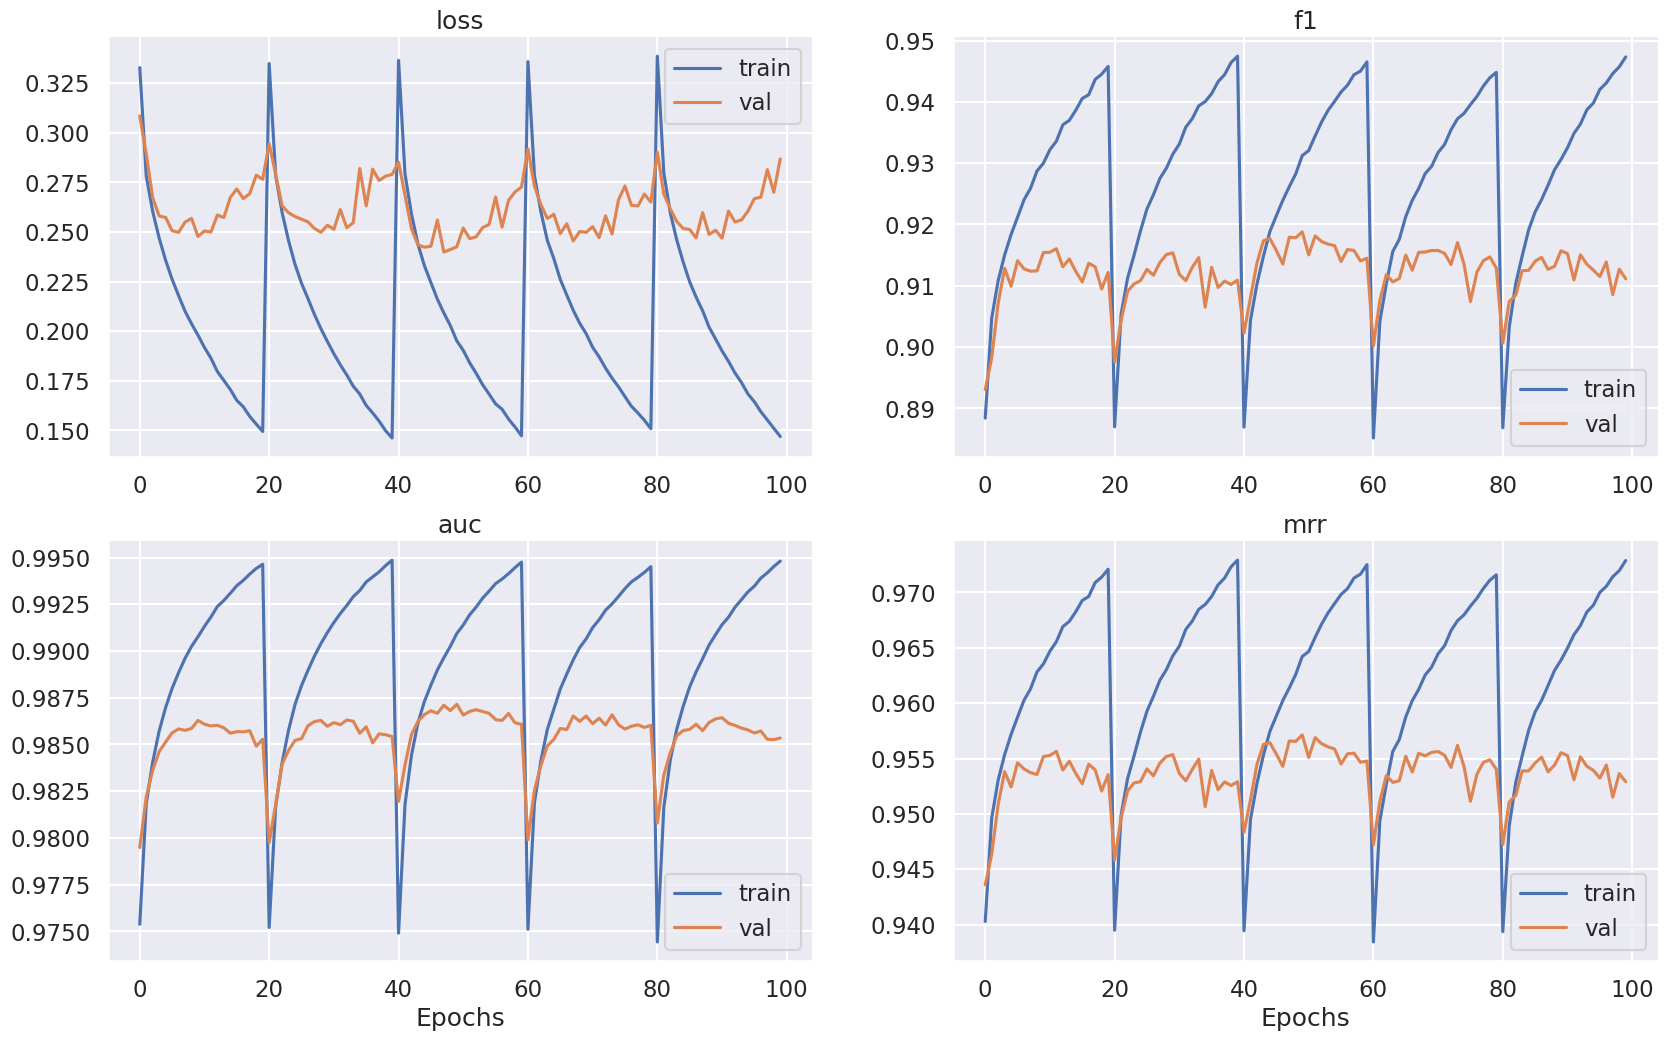

In [ ]:
plot_results(result_list)